Import Libraries and Load Data

In [1]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()

# Print feature names and target names
print(f"Features: {cancer.feature_names}")
print("")
print(f"Target: {cancer.target_names}")




Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


In [2]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Map target values to labels for better readability
df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Exploration

In [3]:
# Check the shape of the DataFrame
df.shape




(569, 31)

In [4]:
# Split the data into features (X) and target (y)
X = df.drop(columns=["target"])
y = df["target"]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (455, 30)
Test: (114, 30)


Hyperparameter Tuning with GridSearchCV

In [5]:
# Import additional libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Record the starting time for measuring processing time
t0 = time.time()

# Define a hyperparameter grid for GridSearchCV
parameters = {
    'n_estimators': [30, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [4, 5, 6, 7, 8],
    'max_features': ['sqrt', 'log2']
}

# Create a RandomForestClassifier with parallel processing (n_jobs=-1)
estimator = RandomForestClassifier(n_jobs=-1)

# Perform Grid Search for hyperparameter tuning
clf = GridSearchCV(estimator=estimator,
                   param_grid=parameters,
                   cv=10,
                   scoring='f1',
                   n_jobs=-1,
                   verbose=True)
clf.fit(X, y)

# Record the ending time for processing time calculation
t1 = time.time()
print(f"Processing time: {t1-t0:.5f}")

# Print the best hyperparameters and the corresponding best score
print("best parameters:")
print(clf.best_params_)
print("best scores")
print(clf.best_score_)


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Processing time: 259.34838
best parameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
best scores
0.9765155889810908


Model Training and Evaluation

In [6]:
# Create a RandomForestClassifier with the best hyperparameters
model = RandomForestClassifier(**clf.best_params_, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on training and testing data
from sklearn import metrics
from sklearn.model_selection import cross_validate
import numpy as np

# Cross-validate the model
cv_results = cross_validate(model, X, y, cv=10)

# Get the test scores
test_scores = cv_results["test_score"]

# Calculate and print the average test score
avg_test_score = np.average(test_scores)
print(f"Average Test Score: {avg_test_score:.2f}")

# Calculate and print training and testing accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")



Average Test Score: 0.96
Training Accuracy: 1.00
Testing Accuracy: 0.96


In [8]:
import matplotlib.pyplot as plt

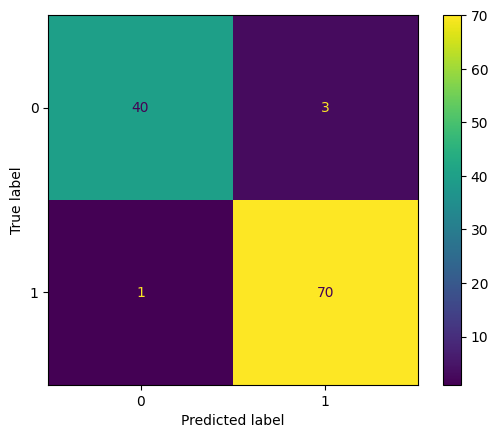

In [9]:

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Feature Importance

In [10]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_imp = pd.DataFrame(sorted(zip(feature_importances, X_train.columns), reverse=True),
                           columns=['Value', 'Feature'])



feature_imp



,Value,Feature
0,0.132186,worst radius
1,0.090198,worst perimeter
2,0.089436,mean concave points
3,0.087303,worst area
4,0.085756,worst concave points
5,0.060413,mean concavity
6,0.055010,mean area
7,0.045009,mean perimeter
8,0.040586,worst concavity
9,0.037793,area error


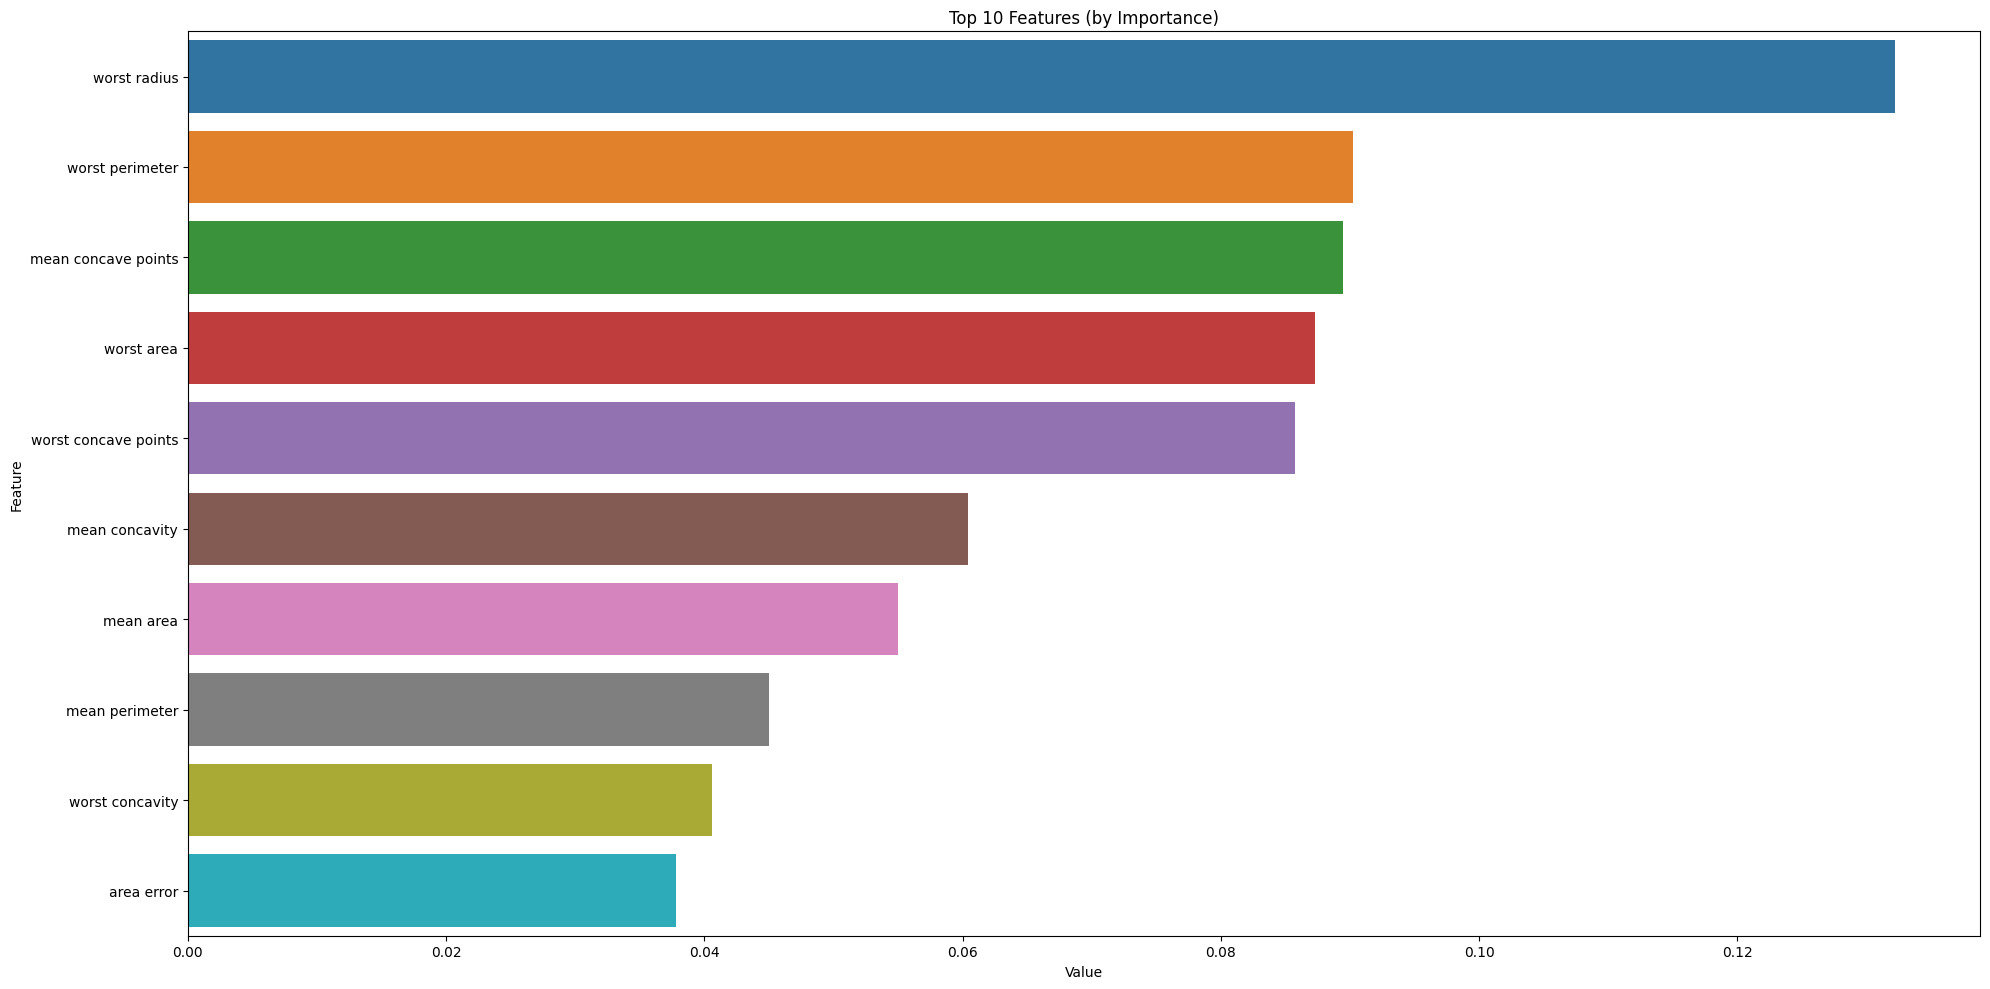

In [11]:
# Plot the top 10 features by importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.head(10))
plt.title('Top 10 Features (by Importance)')
plt.tight_layout()
plt.show()